In [1]:
import trino
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
conn = trino.dbapi.connect(host='192.168.1.71',port=8083,user='trino',catalog='hive', schema="data") 
cur = conn.cursor() 
cur.execute('show tables') 
i= cur.fetchall() 
i 

[['bankchurners'],
 ['bankloan'],
 ['diabetes'],
 ['german_credit_data'],
 ['gld_price_data'],
 ['heart'],
 ['insurance'],
 ['mobile'],
 ['predictive'],
 ['salary'],
 ['shipping'],
 ['shop_customer'],
 ['tesla'],
 ['walmart_sales']]

In [4]:
conn = trino.dbapi.connect(host='192.168.1.71',port=8083,user='trino',catalog='hive', schema="data") 
cur = conn.cursor() 
cur.execute('select * from bankloan') 
f= cur.fetchall() 
f 

[[1, 25, 1, 49, 91107, 4, 1.6, 1, 0, 0, 1, 0, 0, 0],
 [2, 45, 19, 34, 90089, 3, 1.5, 1, 0, 0, 1, 0, 0, 0],
 [3, 39, 15, 11, 94720, 1, 1.0, 1, 0, 0, 0, 0, 0, 0],
 [4, 35, 9, 100, 94112, 1, 2.7, 2, 0, 0, 0, 0, 0, 0],
 [5, 35, 8, 45, 91330, 4, 1.0, 2, 0, 0, 0, 0, 0, 1],
 [6, 37, 13, 29, 92121, 4, 0.4, 2, 155, 0, 0, 0, 1, 0],
 [7, 53, 27, 72, 91711, 2, 1.5, 2, 0, 0, 0, 0, 1, 0],
 [8, 50, 24, 22, 93943, 1, 0.3, 3, 0, 0, 0, 0, 0, 1],
 [9, 35, 10, 81, 90089, 3, 0.6, 2, 104, 0, 0, 0, 1, 0],
 [10, 34, 9, 180, 93023, 1, 8.9, 3, 0, 1, 0, 0, 0, 0],
 [11, 65, 39, 105, 94710, 4, 2.4, 3, 0, 0, 0, 0, 0, 0],
 [12, 29, 5, 45, 90277, 3, 0.1, 2, 0, 0, 0, 0, 1, 0],
 [13, 48, 23, 114, 93106, 2, 3.8, 3, 0, 0, 1, 0, 0, 0],
 [14, 59, 32, 40, 94920, 4, 2.5, 2, 0, 0, 0, 0, 1, 0],
 [15, 67, 41, 112, 91741, 1, 2.0, 1, 0, 0, 1, 0, 0, 0],
 [16, 60, 30, 22, 95054, 1, 1.5, 3, 0, 0, 0, 0, 1, 1],
 [17, 38, 14, 130, 95010, 4, 4.7, 3, 134, 1, 0, 0, 0, 0],
 [18, 42, 18, 81, 94305, 4, 2.4, 1, 0, 0, 0, 0, 0, 0],
 [19, 46, 21

In [5]:
df=pd.DataFrame(f,columns=[i[0] for i in cur.description])

In [6]:
df

,id,age,experience,income,zip code,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,65,39,121,92612,1,2.0,1,0,0,0,0,0,0
95,96,38,12,48,95617,4,0.2,3,0,0,0,0,1,0
96,97,41,15,80,95014,1,5.2,1,0,0,0,0,0,0
97,98,54,28,161,92121,1,2.9,1,0,0,0,0,1,0


In [7]:
df.isnull().sum()

id                    0
age                   0
experience            0
income                0
zip code              0
family                0
ccavg                 0
education             0
mortgage              0
personal loan         0
securities account    0
cd account            0
online                0
creditcard            0
dtype: int64

In [8]:
df.describe()

,id,age,experience,income,zip code,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,45.080808,19.929293,78.010101,93281.929293,2.404040,2.116162,1.939394,49.424242,0.121212,0.151515,0.050505,0.505051,0.232323
std,28.722813,10.647101,10.331498,47.759708,1754.722033,1.219896,1.829950,0.866828,97.336476,0.328035,0.360375,0.220099,0.502519,0.424463
min,1.000000,25.000000,-1.000000,8.000000,90019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,37.500000,12.500000,40.500000,91735.500000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,45.000000,20.000000,71.000000,94022.000000,2.000000,1.700000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,74.500000,54.000000,28.000000,114.500000,94661.000000,4.000000,2.850000,3.000000,48.500000,0.000000,0.000000,0.000000,1.000000,0.000000
max,99.000000,67.000000,41.000000,194.000000,95819.000000,4.000000,8.900000,3.000000,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.drop('mortgage', axis=1,inplace=True)

In [10]:
df.drop('zip code', axis=1,inplace=True)

In [11]:
df.head()

,id,age,experience,income,family,ccavg,education,personal loan,securities account,cd account,online,creditcard
0,1,25,1,49,4,1.6,1,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1


In [12]:
val=df.isnull().values.any()

if val==True:
    print("Missing values present : ", df.isnull().values.sum())
    my_data=df.dropna()
else:
    print("No missing values present")

No missing values present


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,99.0,50.000000,28.722813,1.0,25.5,50.0,74.50,99.0
age,99.0,45.080808,10.647101,25.0,37.5,45.0,54.00,67.0
experience,99.0,19.929293,10.331498,-1.0,12.5,20.0,28.00,41.0
income,99.0,78.010101,47.759708,8.0,40.5,71.0,114.50,194.0
family,99.0,2.404040,1.219896,1.0,1.0,2.0,4.00,4.0
ccavg,99.0,2.116162,1.829950,0.0,0.7,1.7,2.85,8.9
education,99.0,1.939394,0.866828,1.0,1.0,2.0,3.00,3.0
personal loan,99.0,0.121212,0.328035,0.0,0.0,0.0,0.00,1.0
securities account,99.0,0.151515,0.360375,0.0,0.0,0.0,0.00,1.0
cd account,99.0,0.050505,0.220099,0.0,0.0,0.0,0.00,1.0


In [14]:
df.apply(lambda x: len(x.unique()))

id                    99
age                   38
experience            38
income                68
family                 4
ccavg                 42
education              3
personal loan          2
securities account     2
cd account             2
online                 2
creditcard             2
dtype: int64

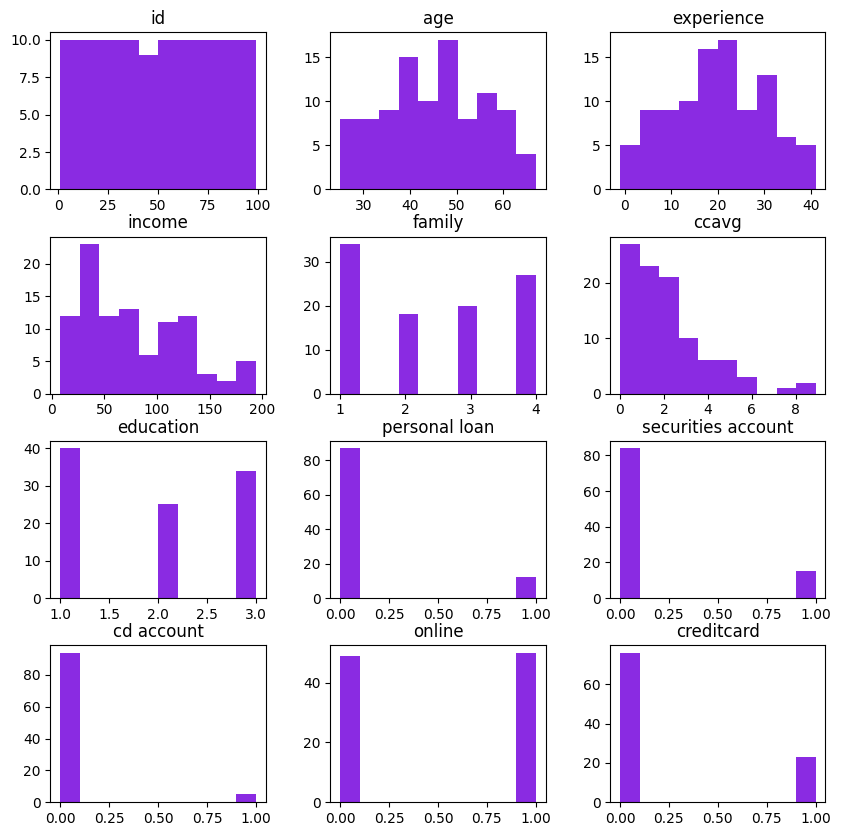

In [15]:
df.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

In [29]:
df[df['experience'] < 0]['experience'].count()

0

In [30]:
my_dataExp = df.loc[df['experience'] >0]
negExp = df.experience < 0
column_name = 'experience'
my_data_list = df.loc[negExp]['id'].tolist()

In [31]:
negExp.value_counts()

False    99
Name: experience, dtype: int64

In [32]:
for id in my_data_list:
    age = df.loc[np.where(df['id']==id)]["age"].tolist()[0]
    education = df.loc[np.where(df['id']==id)]["education"].tolist()[0]
    df_filtered = my_dataExp[(my_dataExp.age == age) & (my_dataExp.education == education)]
    exp = df_filtered['experience'].median()
    df.loc[df.loc[np.where(df['id']==id)].index, 'experience'] = exp
    
#The records with the ID, get the values of Age and Education columns.
#Then apply filter for the records matching the criteria from the dataframe 
#which has records with positive experience and take the median.
#Apply the median again to the location(records) which had negative experience.   

In [33]:
df[df['experience'] < 0]['experience'].count()

0

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,99.0,50.000000,28.722813,1.0,25.5,50.0,74.50,99.0
age,99.0,45.080808,10.647101,25.0,37.5,45.0,54.00,67.0
experience,98.0,20.142857,10.162596,1.0,13.0,20.0,28.00,41.0
income,99.0,78.010101,47.759708,8.0,40.5,71.0,114.50,194.0
family,99.0,2.404040,1.219896,1.0,1.0,2.0,4.00,4.0
ccavg,99.0,2.116162,1.829950,0.0,0.7,1.7,2.85,8.9
education,99.0,1.939394,0.866828,1.0,1.0,2.0,3.00,3.0
personal loan,99.0,0.121212,0.328035,0.0,0.0,0.0,0.00,1.0
securities account,99.0,0.151515,0.360375,0.0,0.0,0.0,0.00,1.0
cd account,99.0,0.050505,0.220099,0.0,0.0,0.0,0.00,1.0


<Axes: xlabel='family', ylabel='count'>

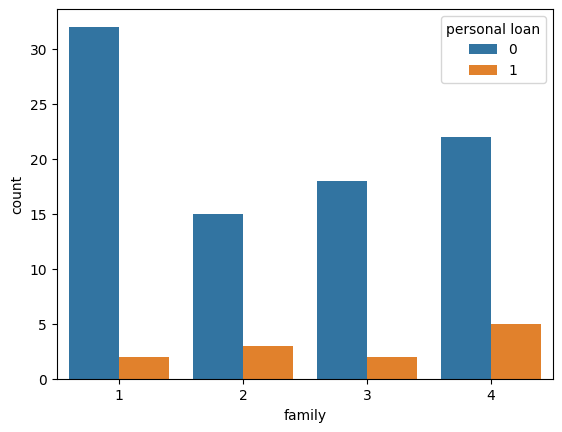

In [35]:
sns.countplot(x='family',data=df,hue='personal loan')

In [38]:
data=df.drop(['id','experience'], axis =1 )
data.head(10)

,age,income,family,ccavg,education,personal loan,securities account,cd account,online,creditcard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
5,37,29,4,0.4,2,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,1
8,35,81,3,0.6,2,0,0,0,1,0
9,34,180,1,8.9,3,1,0,0,0,0


In [40]:
data1=data[['age','income','family','ccavg','education','securities account','cd account','online','creditcard','personal loan']]

In [41]:
data1

,age,income,family,ccavg,education,securities account,cd account,online,creditcard,personal loan
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
94,65,121,1,2.0,1,0,0,0,0,0
95,38,48,4,0.2,3,0,0,1,0,0
96,41,80,1,5.2,1,0,0,0,0,0
97,54,161,1,2.9,1,0,0,1,0,0


In [43]:
array = data1.values
X = array[:,0:9] # select all rows and first 10 columns which are the attributes
Y = array[:,9]   # select all rows and the 10th column which is the classification "0", "1"
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

# LogisticRegression

In [44]:
# Fit the model on 30%
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
accuracy=print('Accuracy:',model_score)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=model_score  # Accuracy of Logistic regression model

Accuracy: 0.9
confusion_matrix:
[[24  2]
 [ 1  3]]


/usr/local/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [48]:
X = data1.values[:,0:9]  ## Features
Y = data1.values[:,9]  ## Target.values[:,10]  ## Target

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [50]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [51]:
Y_pred = clf.predict(X_test)

In [52]:
B=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',B)

Accuracy_score: 1.0


In [53]:
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_pred))

1.0


In [54]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix:
[[29  0]
 [ 0  1]]


In [55]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [56]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data1))
X_std.columns = data1.columns

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(data1.iloc[:,1:11]) 
y = np.array(data1['personal loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# KNeighborsClassifier

In [58]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.95
0.95
0.9
0.9


In [59]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))


In [65]:
from sklearn.metrics import accuracy_score

neighbors = range(1, 20, 2)
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# changing to misclassification error
MSE = [1 - x for x in scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


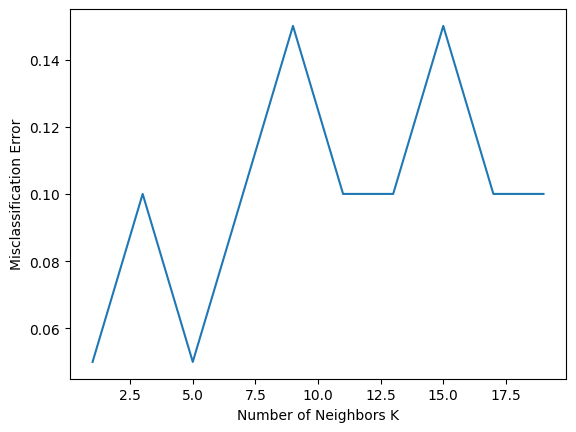

In [66]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [67]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
C=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',C)    
print(recall_score(y_test, y_pred))

Accuracy_score: 0.95
1.0


In [68]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[17  1]
 [ 0  2]]


In [70]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = df["personal loan"]
features=df.drop(['id','experience'], axis =1 )
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.30, random_state = 10)

# SVC

In [71]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [72]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [73]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[28  0]
 [ 0  2]]


In [74]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.0


In [75]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [76]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8985507246376812
0.9333333333333333


In [77]:
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.898551


In [78]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8985507246376812
0.9333333333333333


In [79]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.898551
0,Poly,0.898551


In [80]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

##print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9333333333333333


In [81]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Sigmoid'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.898551
0,Poly,0.898551
0,Sigmoid,0.855072


In [82]:
print(A) #Accuracy of Logistic regression model

0.9


In [83]:
print(B) #Accuracy of Naive Bayes' Model

1.0


In [84]:
print(C)  #Accuracy of KNN Model

0.95


In [85]:
resultsDf #Accuracy of SVM Model

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.898551
0,Poly,0.898551
0,Sigmoid,0.855072


Conclusion:
The classification goal is to predict the likelihood of a liability customer buying personal loans.
A bank wants a new marketing campaign; so that they need information about the correlation between the variables given in the dataset.
Here I used 4 classification models to study.
From the accuracy scores , it seems like "KNN" algorithm have the highest accuracy and stability.
But we can use SVM also as all the Kernels have good accuracy as well.

In [86]:
import os
os.environ["MLFLOW_TRACKING_URI"] = "http://localhost:5000"

In [87]:
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("bankloan")
with mlflow.start_run():
    mlflow.log_param("param1", 1)
    mlflow.log_metric("metric1", 2.5)


In [88]:
import os 
from random import random, randint 
from mlflow import log_metric, log_param,artifacts

In [89]:
import mlflow

def create_experiment(experiment_name, run_name, run_metrics, model,knn,svc_model, confusion_matrix_path=None, run_params=None):

    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name=run_name):

        if run_params is not None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])

        if confusion_matrix_path is not None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_matrix.png')

        # if roc_auc_plot_path is not None:
        # mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot.png")

        mlflow.set_tag("tag1", "bankloan")
        mlflow.set_tags({"tag2": "Logistic Regression", "tag3": "KNeighborsClassifier", "tag4": "SVC"})
        mlflow.sklearn.log_model(model, "model",knn,"knn",svc_model,"svc", registered_model_name="bankloan")


In [90]:
from random import random, randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="Bankloan") as run:
    params = {"random_state": 42}
    sk_learn_lr = LogisticRegression(**params)

    # Log parameters and metrics using the MLflow APIs
    mlflow.log_params(params)
    mlflow.log_param("param_1", randint(0, 100))
    mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=sk_learn_lr,
        artifact_path="LogisticRegression",
        registered_model_name="LogisticRegression",
    )





Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2023/04/05 14:34:07 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: LogisticRegression, version 2
Created version '2' of model 'LogisticRegression'.


In [92]:
client = mlflow.tracking.MlflowClient()

client.transition_model_version_stage(
    name="LogisticRegression",
    version=2,
    stage="Production"
)


<ModelVersion: creation_timestamp=1680685447514, current_stage='Production', description='', last_updated_timestamp=1680685576389, name='LogisticRegression', run_id='e52bd040b72e43cebcc8451f049132e2', run_link='', source='mlflow-artifacts:/668818565217247779/e52bd040b72e43cebcc8451f049132e2/artifacts/LogisticRegression', status='READY', status_message='', tags={}, user_id='', version='2'>

In [95]:
from random import random, randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="Bankloan") as run:
    params = {"random_state": 42}
    sk_learn_lr = SVC(**params)

    # Log parameters and metrics using the MLflow APIs
    mlflow.log_params(params)
    mlflow.log_param("param_1", randint(0, 100))
    mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=sk_learn_lr,
        artifact_path="SVC",
        registered_model_name="SVC",
    )


Successfully registered model 'SVC'.
2023/04/05 14:55:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: SVC, version 1
Created version '1' of model 'SVC'.


In [98]:
client = mlflow.tracking.MlflowClient()

client.transition_model_version_stage(
    name="SVC",
    version=1,
    stage="Production"
)


<ModelVersion: creation_timestamp=1680686740016, current_stage='Production', description='', last_updated_timestamp=1680687048363, name='SVC', run_id='66044b02e145439f88c0aaae43a1d213', run_link='', source='mlflow-artifacts:/668818565217247779/66044b02e145439f88c0aaae43a1d213/artifacts/SVC', status='READY', status_message='', tags={}, user_id='', version='1'>

In [104]:
from random import random, randint
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn

def knn_regressor():
    return KNeighborsRegressor(n_neighbors=5)

with mlflow.start_run(run_name="Bankloan") as run:
    np.random.seed(42)  # set the random seed

    sk_learn_lr = knn_regressor()

    # Log parameters and metrics using the MLflow APIs
    params = {"random_state": 42}
    mlflow.log_params(params)
    mlflow.log_param("param_1", randint(0, 100))
    mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=sk_learn_lr,
        artifact_path="KNN",
        registered_model_name="KNN",
    )


Successfully registered model 'KNN'.
2023/04/05 15:37:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: KNN, version 1
Created version '1' of model 'KNN'.


In [105]:
client = mlflow.tracking.MlflowClient()

client.transition_model_version_stage(
    name="KNN",
    version=1,
    stage="Production"
)

#http://127.0.0.1:5000

<ModelVersion: creation_timestamp=1680689226505, current_stage='Production', description='', last_updated_timestamp=1680689321176, name='KNN', run_id='4072c0d765b24a0a8aa6f63046a623a7', run_link='', source='mlflow-artifacts:/668818565217247779/4072c0d765b24a0a8aa6f63046a623a7/artifacts/KNN', status='READY', status_message='', tags={}, user_id='', version='1'>

In [1]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1
